# Least Squares

Many real world relationships are linear (or nearly linear) in nature, such as the length of a piece of wire and its electrical resistance, how often one goes on long ditance runs and their marathon time or the number of ethnic minorities crammed into sweatshops and profits for western consumer goods companies...

Least squares is a method of finding the mathematical formula which best describes one such linear relationship by determining the line of best fit for a set of data.


It is popular a popular choice for mathematical modelling as it enables relatively simple deriviation of a mathematically tractable analytic solution, but has somewhat fallen out of favour as modern computation can comfortably tackle far more complex and flexible regression functions.

Boradly, there are two forms of least squares regression. Ordinary least squares is used to fit models where there is a direct linear relationship between the the input variable and the target. The alternative formulation exists for use in non-linear regression and is not covered here.

The simplest linear model is of the form:
$$y = mx + c$$
where y and x are some observed variables and m and c are constants defining the replationship between x and y.

In machine learning, these are typically referred to as weights symbolised as $w_i$. for example:
$$ y = w_0x + w_1$$

The goal of least squares regression is to find values of $w_0$ and $w_1$  for which $y = w_0x + w_1$ best represents the data you want to model.

In order to find a line of best fit for the data, it is useful to have a definition of what it means to be best and for that we define a loss function which we want to minimize.

For a simple dataset consisting of $N$ observations of x and y variables $\{(x_1,y_1)...(x_N,y_N)\}$, the loss funtion takes the form:
$$loss = \frac{1}{N}\sum^N_{n=1}(y_n-(w_0+w_1x_n))^2$$

Which describes how for from the true observed values of $y$ are the estimates of $w_0+w_1x_n$

For the model, we need to find

$$\underset{w_0,w_1}{argmin}\frac{1}{N}\sum^N_{n=1}(y_n-(w_0+w_1x_n))^2$$

Or, the values for $w_0$ and $w_1$ such that the loss is minimised.

## Example: Life expectancy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Life expectancy has increased dramatically over the past century. Not only is life expectancy an important measure of global health, but how long we live and has important implications for societies and cultures across the world.

The figure below shows the average life expectancy across the world at birth form 1960 - 2017. The aim is to fit a model of the relationship between year and life expectancy.

Such models are useful because they allow us to ask questions about unseen data, such as

* When will the first person to live to 150 years old be born?
* What was the life expectancy in 1899?

Or provide a simple way to compare 2 models:
* How does the rate of change worldwide compare to Sweden?

In [10]:
data = np.loadtxt(r"data\life_expectancy.txt")

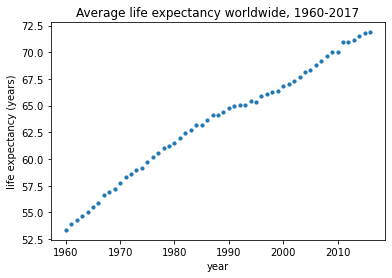

In [18]:
plt.scatter(data[:,0], data[:,1]+np.random.normal(0,0.1,57), 10)
plt.xlabel("year")
plt.ylabel("life expectancy (years)")
plt.title("Average life expectancy worldwide, 1960-2017")
plt.show()

* Clearly, the data does not follow a perfect straight line. As such there is no combination of $m$ and $c$ for which $y=mx+c$ for all of the points in the data. Least squares can also be thought of as an approximation of $y=mx+c$ where a solution does not exist.
* The year is probably not the only factor governing life expectancy, it is most likely due to advances in medicine, hygeine, agriculture, etc. There is a statistical relationships between year and life expectancy, but not necessarilty a causal relationship.

The linear model that will be used to fit this data is defined as
$$y=w_0x+w_1$$
or
$$\text{life expectancy}=w_0\times \text{year}+w_1$$
and the loss function that will be minimised:
$$loss = \frac{1}{N}\sum^N_{n=1}(y_n-(w_0+w_1x_n))^2$$

The loss function is simply the average squared difference between the life expectancy for a given year, $y_i$, and the predicted value for $y_i$ given the year, $x$ and the equauation $y=w_0x+w_1$. Squaring the errors ([technically, the residuals](https://en.wikipedia.org/wiki/Errors_and_residuals)) serves to prevent large positive and large negative errors cancelling each other out and ensures that the function has a minimum(otherwise, by continually increasing $w_0x+w_1$, the loss could be infinitely reduced). Squaring the error is mathematically more concventient than taking the absolute value and, unlike the absoluate value function, the squared error is continuously differentiable.


Take for example a dummy dataset which follows the linear relationship $y=-0.7x+45+\epsilon$ ......

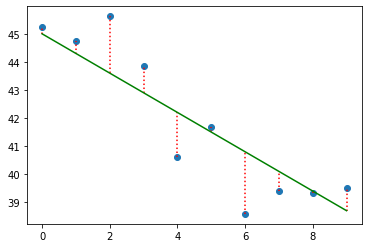

In [58]:
x = np.arange(10)
line = -0.7 * x + 45
y = -0.7 * x + 45 + np.random.normal(size=10)

plt.scatter(x, y)
plt.plot(x, line, 'g')
plt.vlines(x, np.min([line, y], axis=0), np.max([line, y], axis=0), colors='r', linestyle=':')

The least squares methodology can be extrapolated to an arbitrary number of dimensions, but the underlying concept remains the same.




To begin to minimise the cost function, start by finding values for $w_0$ and $w_1$ at which the partial derivatvies of the loss function wrt $w_0$ and $w_1$ are 0.

Start by multiplying out the brackets

$$\begin{align}
loss &= \frac{1}{N}\sum^N_{n=1}(y_n-(w_0+w_1x_n))^2 \\
&= \frac{1}{N}\sum^N_{n=1}(w_1^2x_n^2 + 2w_1x_n(w_0-y_n) + w_0^2-2w_0y_n + y_n^2) \\
\end{align}$$

Starting with $w_1$, terms in that do not include $w_1$ can be ignored (as their partial derivative with respect to w1 will
be zero). Removing these terms leaves

$$\frac{1}{N}\sum^N_{n=1}(w_1^2x_n^2 + 2w_1x_nw_0 - 2w1x_ny_n)$$

Taking terms that are not indexed by n outside of the sum and rearranging makes the exxpression slightly simpler

$$ w_1^2\frac{1}{N}\Bigg(\sum^N_{n=1}x_n^2\Bigg) + 2w_1\frac{1}{N} \Bigg(\sum^N_{n=1}x_n(w_0-yn)\Bigg)$$

Taking the partial derivative with respect to $w_1$ gives

$$ \frac{\partial L}{\partial w_1} = 2w_1^2\frac{1}{N}\Bigg(\sum^N_{n=1}x_n^2\Bigg) + \frac{2}{N} \Bigg(\sum^N_{n=1}x_n(w_0-yn)\Bigg)$$

and the same for $w_0$

$$ \frac{\partial L}{\partial w_0} = 2w_0 + 2w_1 \frac{1}{N} \Bigg(\sum^N_{n=1}x_n\Bigg) - \frac{2}{N}\Bigg(\sum^N_{n=1}t_n\Bigg)$$

To find the values of $w_0$ and $w_1$ for the model, need to find the values where $\frac{\partial L}{\partial w_0} = \frac{\partial L}{\partial w_1} = 0$

In [53]:
from sklearn.datasets import load_breast_cancer

In [54]:
data = load_breast_cancer()

In [55]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Gradient descent

" The "least squares" method is a form of mathematical regression analysis used to determine the line of best fit for a set of data, providing a visual demonstration of the relationship between the data points. Each point of data represents the relationship between a known independent variable and an unknown dependent variable. "




Using xn; tn to denote the nth Olympic year
and winning time, respectively, the squared difference is defined as
(tn − f(xn; w0; w1))2:
The smaller this number is, the closer the model, at xn, is to tn. Squaring the
difference is important. Without it, we could indefinitely reduce this quantity by
continually increasing f(xn; w0; w1)


This expression is known as the squared loss function, as it describes how much
accuracy we are losing through the use of f(xn; w0; w1) to model tn.


The squared loss is a very common choice, in part due to the fact that it makes finding
the best values of w0 and w1 relatively straightforward { we can derive an analytical solution. However, modern computational power has reduced the importance of
mathematical convenience { there is no longer any excuse for choosing a convenient
loss function over one more suited to the data. 




Often in the real world one expects to find linear relationships between variables. For example,the force of a spring linearly depends on the displacement of the spring:y=kx(hereyisthe force,xis the displacement of the spring from rest, andkis the spring constant).  To testthe proposed relationship, researchers go to the lab and measure what the force is for variousdisplacements.  Thus they assemble data of the form(xn, yn)forn∈ {1, . . . , N}; hereynisthe observed force in Newtons when the spring is displacedxnmeters.






blah blah blah fitting a line, alternatively when solving an equation ax=b but has no solution, want to approximate a instead

fits a line to a dataset, assumes a linear relationship (variations for non linear



simplest example is case of single explanatory variable

this can me modelled with the simple linear equation y=mx+c, using least squares we want to find values for m and c which best suit the data 

in machine learning y=mx+c == y=w0x+w1

$loss = \frac{1}{N}\sum^N_{n=1}(t_n-(w_0+w_1x_n))^2$

to find where the loss is minimised, look for where $\frac{\partial Loss}{\partial w_0}=0$ and $\frac{\partial Loss}{\partial w_1}=0$